In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import os 
os.chdir('D:\\NLP\\Fake News Detection')

df=pd.read_csv('data.csv')

In [2]:
df.head()

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1


In [3]:
for i in range(0,df.shape[0]-1):
    if (df.Body.isnull()[i]):
        df.Body[i]=df.Headline[i]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
df.isnull().sum()

URLs        0
Headline    0
Body        0
Label       0
dtype: int64

In [5]:
import re 
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import stopwords
import string

In [6]:
print('Data Cleaning Started.....')

stop=set(stopwords.words('english'))
punc=list(string.punctuation)
stop.update(punc)

RE_EMOJI=re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
def remove_emoji(text):
    return RE_EMOJI.sub(r' ',text)

RE_HTMLTAG=re.compile(r'<.*?>')
def remove_htmltag(text):
    return RE_HTMLTAG.sub(r' ',text)

RE_BLANKLINE=re.compile(r'^(?:[\t ]*(?:\r?\n|\r))+')
def remove_blankline(text):
    return RE_BLANKLINE.sub(r' ',text)

RE_EMAIL=re.compile(r'[\w._%+-]{1-20}@[\w.-]{2,20}.[A-Za-z]{2-3}')
def remove_email(text):
    return RE_EMAIL.sub(r' ',text)

def remove_stopwords(text):
    filtered=[]
    word_token=word_tokenize(text)
    for word in word_token:
        if word not in stop:
            filtered.append(word)
    text=' '.join(filtered)
    return text

def clean_data(df,columns:list):
    for col in columns:
        df[col]=df[col].apply(lambda x:remove_emoji(x))
        df[col]=df[col].apply(lambda x:remove_htmltag(x))
        df[col]=df[col].apply(lambda x:remove_blankline(x))
        df[col]=df[col].apply(lambda x:remove_email(x))
        df[col]=df[col].apply(lambda x:remove_stopwords(x))
    return df

Data Cleaning Started.....


In [7]:
col=['Body']
clean_data(df,col)
print('Data Cleaning Completed...')

Data Cleaning Completed...


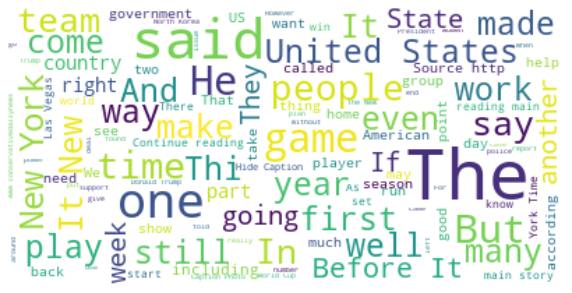

In [21]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
text = " ".join(i for i in df['Body'])

wordcloud = WordCloud(max_font_size = 50, 
                     background_color = "white").generate(text)
plt.figure(figsize = [10,10])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [8]:
df=df.drop(['URLs'],axis=1)

In [9]:
x=df['Body']+df['Headline']
y=df.Label

In [10]:
from sklearn.model_selection import train_test_split as tts
from sklearn.feature_extraction.text import TfidfVectorizer
import itertools
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [11]:
train_x,test_x,train_y,test_y=tts(x,y,test_size=0.2,stratify=y)

In [12]:
tfidf_vect = TfidfVectorizer(stop_words = 'english')
tfidf_train = tfidf_vect.fit_transform(train_x)
tfidf_test = tfidf_vect.transform(test_x)
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vect.get_feature_names())

In [13]:
tfidf_df

,00,000,000ft,000fthunting,000ha,000most,000sq,001,005930,007,...,zócalo,álvaro,école,émigrés,ðÿ,œbrilliant,əˈnänəməs,ʺevery,ʺhe,殆ww
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.113596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3203,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3204,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3205,0.0,0.024060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
clf=MultinomialNB()
clf.fit(tfidf_train,train_y)
pred=clf.predict(tfidf_test)
score=metrics.accuracy_score(test_y,pred)
print('Score : ',score)

Score :  0.9351620947630923


In [32]:
lr=LogisticRegression()
lr.fit(tfidf_train,train_y)
pred=lr.predict(tfidf_test)
train=lr.predict(tfidf_train)
score=metrics.accuracy_score(test_y,pred)
score1=metrics.accuracy_score(train_y,train)
print('Test Score : ',score)
print('Training Score :',score1)

Test Score :  0.9750623441396509
Training Score : 0.9943872778297475


In [28]:
submission=pd.DataFrame(pred,test_y)

In [30]:
submission

,0
Label,
0,0
1,1
1,1
0,0
0,1
...,...
1,1
0,0
1,1
